


**App :** The name of the app

**Category :** The category of the app

**Rating :** The rating of the app in the Play Store

**Reviews :** The number of reviews of the app

**Size :** The size of the app

**Install :** The number of installs of the app

**Type :** The type of the app (Free/Paid)

**Price :** The price of the app (0 if it is Free)

**Content Rating :** The appropiate target audience of the app

**Genres:** The genre of the app

**Last Updated :** The date when the app was last updated

**Current Ver :** The current version of the app

**Android Ver :** The minimum Android version required to run the app


# Step 1 | Setup and Initialization

# Importing Necessary Libraries

In [1025]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from wordcloud import WordCloud

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Hide warnings
import warnings
warnings.filterwarnings('ignore')


<a id="load_dataset"></a>
# <b><span style='color:#fcc36d'>Step 1.2 |</span><span style='color:#ff6200'> Loading the Dataset</span></b>

In [1026]:
df = pd.read_csv("/Users/liuziang/PycharmProjects/Data_preparation/cleaning/googleplaystore.csv")


# Initial Data Analysis


# Dataset Overview

In [1027]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3580,Learn the letters and words,PARENTING,NaN,31,85M,"10,000+",Free,0,Everyone,Parenting;Education,"June 15, 2018",3.2,4.0.3 and up
1673,PAC-MAN,GAME,4.2,685981,37M,"100,000,000+",Free,0,Everyone,Arcade,"May 15, 2018",6.6.3,4.1 and up
7386,RGN CI-Control,BUSINESS,NaN,0,6.0M,50+,Free,0,Everyone,Business,"May 28, 2018",1.2,4.1 and up
3547,"Evernote – Organizer, Planner for Notes & Memos",PRODUCTIVITY,4.6,1488397,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"August 3, 2018",Varies with device,Varies with device
10128,EZ Thanks,BUSINESS,3.2,116,Varies with device,"10,000+",Free,0,Everyone,Business,"June 13, 2018",Varies with device,Varies with device


In [1028]:
df.shape

(10841, 13)

In [1029]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [1030]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000



    
**Here we can see that only Rating column is only in float, so we need to convert numerical columns into int and float.**  

In [1031]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB



# Step 3 | Preprocessing


    
**As most of the features are set to data type object and have suffixes, each feature's data type must be converted into a suitable format for analysis.**

### Checking if all values in number of Reviews numeric
    

## Step 3.1 Reviews

In [1032]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN



    
We could have converted it into integer like we did for Size but the data for this App looks different. It can be noticed that the entries are entered wrong We could fix it by setting Category as nan and shifting all the values, but deleting the sample for now.

In [1033]:
df=df.drop(df.index[10472])


    
**The feature Reviews must be of integer type.**

In [1034]:
df["Reviews"] = df["Reviews"].astype(int)


In [1035]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB



## Step 3.2 Size


* It can be seen that data has metric prefixes(kilo and Mega) along with another string.Replacing k and M with their values to convert values to numeric.

* The feature Size must be of floating type.
* The suffix, which is a size unit, must be removed. \ Example: '19.2M' to 19.2

* If size is given as 'Varies with device' we replace it with 0

* The converted floating values of Size is represented in megabytes units.


In [1036]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     


* Remove all characters from size and convert it to float.



In [1037]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
df['Size']=df['Size'].replace("Varies with device",np.nan)
df['Size']=df['Size'].astype('float')
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64


    
* There is a problem! There are some applications size in megabyte and some in kilobyte.

In [1038]:
###### Convert mega to kilo then convert all to mega
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)
df['Size']=df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [1039]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


## Step 3.3 Installs and Price


* The feature Installs must be of integer type.

* The characters ',' and '+' must be removed. \ Example: '10,000+' to 10000

* The feature Price must be of floating type.

* The suffix '\$' must be removed if Price is non-zero. \ Example: '$4.99' to 4.99

In [1040]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [1041]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [1042]:
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        df[col]=df[col].str.replace(item,'')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [1043]:
df.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [1044]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [1045]:
df[df['Price']=='Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [1046]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


## Step 3.3 last updated


    
* Updating the Last Updated column's datatype from string to pandas datetime.

* Extracting new columns Updated Year, Updated Month and updated day.

In [1047]:
#### Change Last update into a datetime column
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [1048]:
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

In [1049]:
df.drop('Last Updated', axis=1, inplace=True)

In [1050]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,2018


In [1051]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(2), int64(2), object(7)
memory usage: 1.2+ MB


## Step 3.4 Make Corruption

In [1052]:
from src.corruptions.generic import InjectMissingValues
from src.corruptions.SwapValues import SwapColumnValues
from src.corruptions.gaussian_noise import GaussianNoise, Scaling

def inject_errors_to_multiple_columns(df):
    # Apply Gaussian noise to multiple numerical columns
    for column in ['Rating','Size','Price']:
        gaussian_noise = GaussianNoise(column=column, fraction=0.5)  # Increased fraction for a more pronounced effect
        df = gaussian_noise.transform(df)



    # Scale 'english_score' and 'geography_score'
    for column in ['Reviews', 'Installs','Price']:
        scaling = Scaling(column=column, fraction=0.5)
        df = scaling.transform(df)

    # Inject missing values into 'weekly_self_study_hours' and a categorical column
    for column in ['Installs','Price']:
        inject_missing_values = InjectMissingValues(column=column, fraction=0.1)
        df = inject_missing_values.transform(df)

    return df
df = inject_errors_to_multiple_columns(df).copy()


# Step 4 Data cleaning

In [1053]:
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Size,1695,15.636531
Rating,1474,13.597786
Installs,1084,10.000000
Price,1084,10.000000
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000


<BarContainer object of 14 artists>

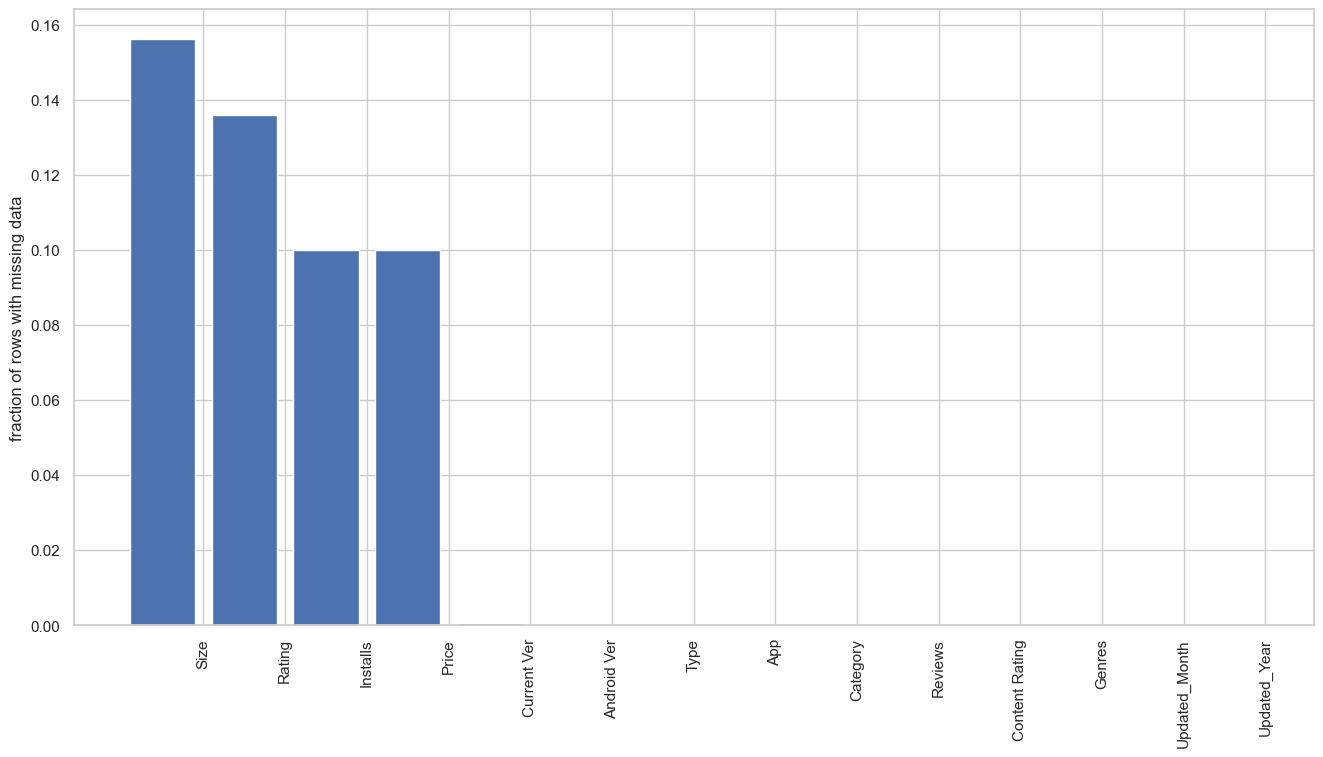

In [1054]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)


**Its clear that we have missing values in Rating, Type, Content Rating, Current Ver and Android Ver.**


## Step 4.1 Handling missing values



**I Clean missing values using Random Value Imputation Because This the best way to To maintain distrbuation For each feature.**

In [1055]:
def impute_median(series):
    return series.fillna(series.median())

df['Installs'] = df['Installs'].transform(impute_median)

In [1056]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           9756 non-null   float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(5), int32(2), object(7)
memory usage: 1.4+ MB


In [1057]:
def impute_median(series):
    return series.fillna(series.median())

df['Price'] = df['Price'].transform(impute_median)

In [1058]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(5), int32(2), object(7)
memory usage: 1.4+ MB


In [1059]:
def impute_median(series):
    return series.fillna(series.median())

df['Rating'] = df['Rating'].transform(impute_median)

In [1060]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(5), int32(2), object(7)
memory usage: 1.4+ MB


In [1061]:
def impute_median(series):
    return series.fillna(series.median())

df['Size'] = df['Size'].transform(impute_median)

In [1062]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(5), int32(2), object(7)
memory usage: 1.4+ MB


In [1063]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated_Month     0
Updated_Year      0
dtype: int64

In [1064]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)

In [1065]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated_Month     0
Updated_Year      0
dtype: int64


## Step 4.2 Delete duplicated data

In [1066]:
duplicate = df.duplicated()
print(duplicate.sum())

7


In [1067]:
df.drop_duplicates(inplace=True)

In [1068]:
duplicate = df.duplicated()
print(duplicate.sum())

0



Extract Numerical and categorical features

In [1069]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Month',
 'Updated_Year']

In [1070]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']


## Step 4.3 Check outliers

<Axes: >

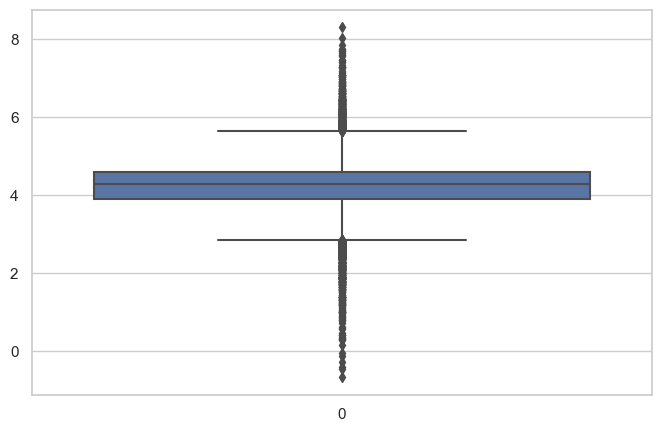

In [1071]:
sns.boxplot(df["Rating"])

<Axes: >

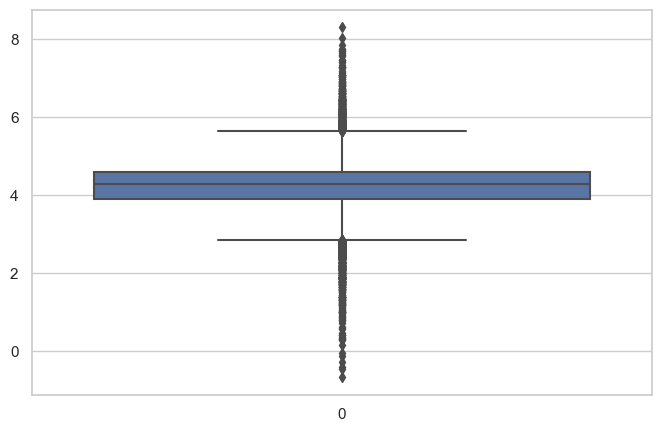

In [1072]:
sns.boxplot(df["Rating"])

<Axes: >

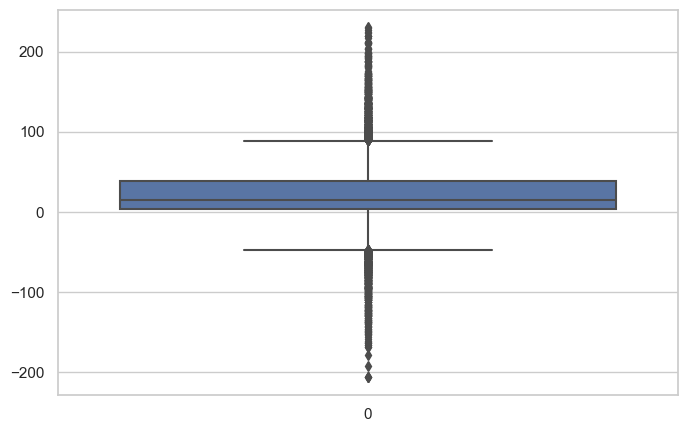

In [1073]:
sns.boxplot(df["Size"])

<Axes: >

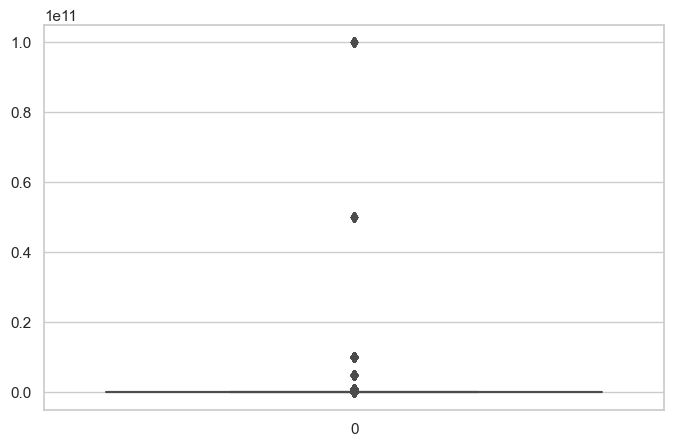

In [1074]:
sns.boxplot(df["Installs"])

<Axes: >

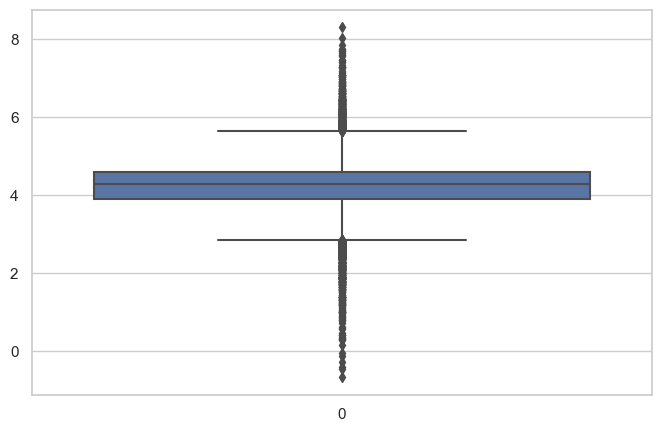

In [1075]:
sns.boxplot(df["Rating"])

<Axes: >

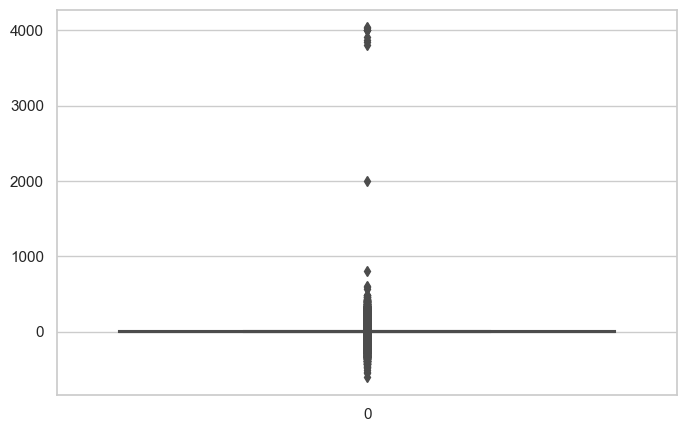

In [1076]:
sns.boxplot(df["Price"])


# Step 5 Exploratory Data Analysis (EDA)



## Category Column

In [1077]:
df['Category'].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                459
PRODUCTIVITY            422
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      340
PHOTOGRAPHY             335
SOCIAL                  294
NEWS_AND_MAGAZINES      283
SHOPPING                259
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

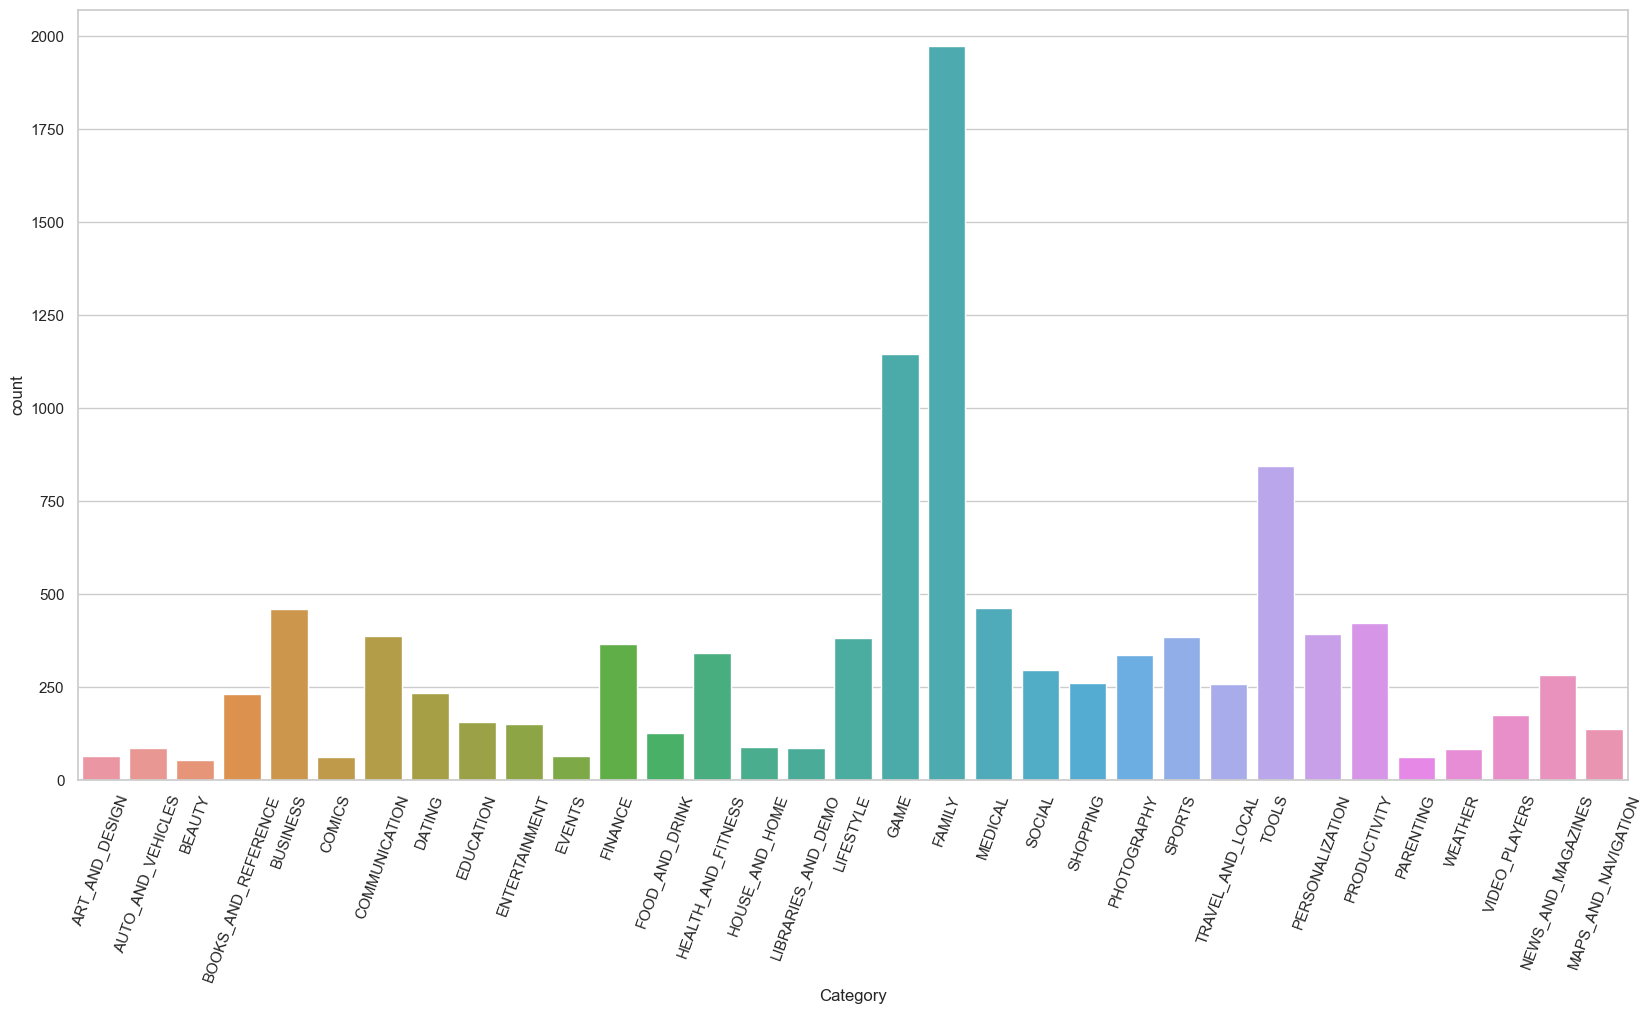

In [1078]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=df)
plt.xticks(rotation=70)

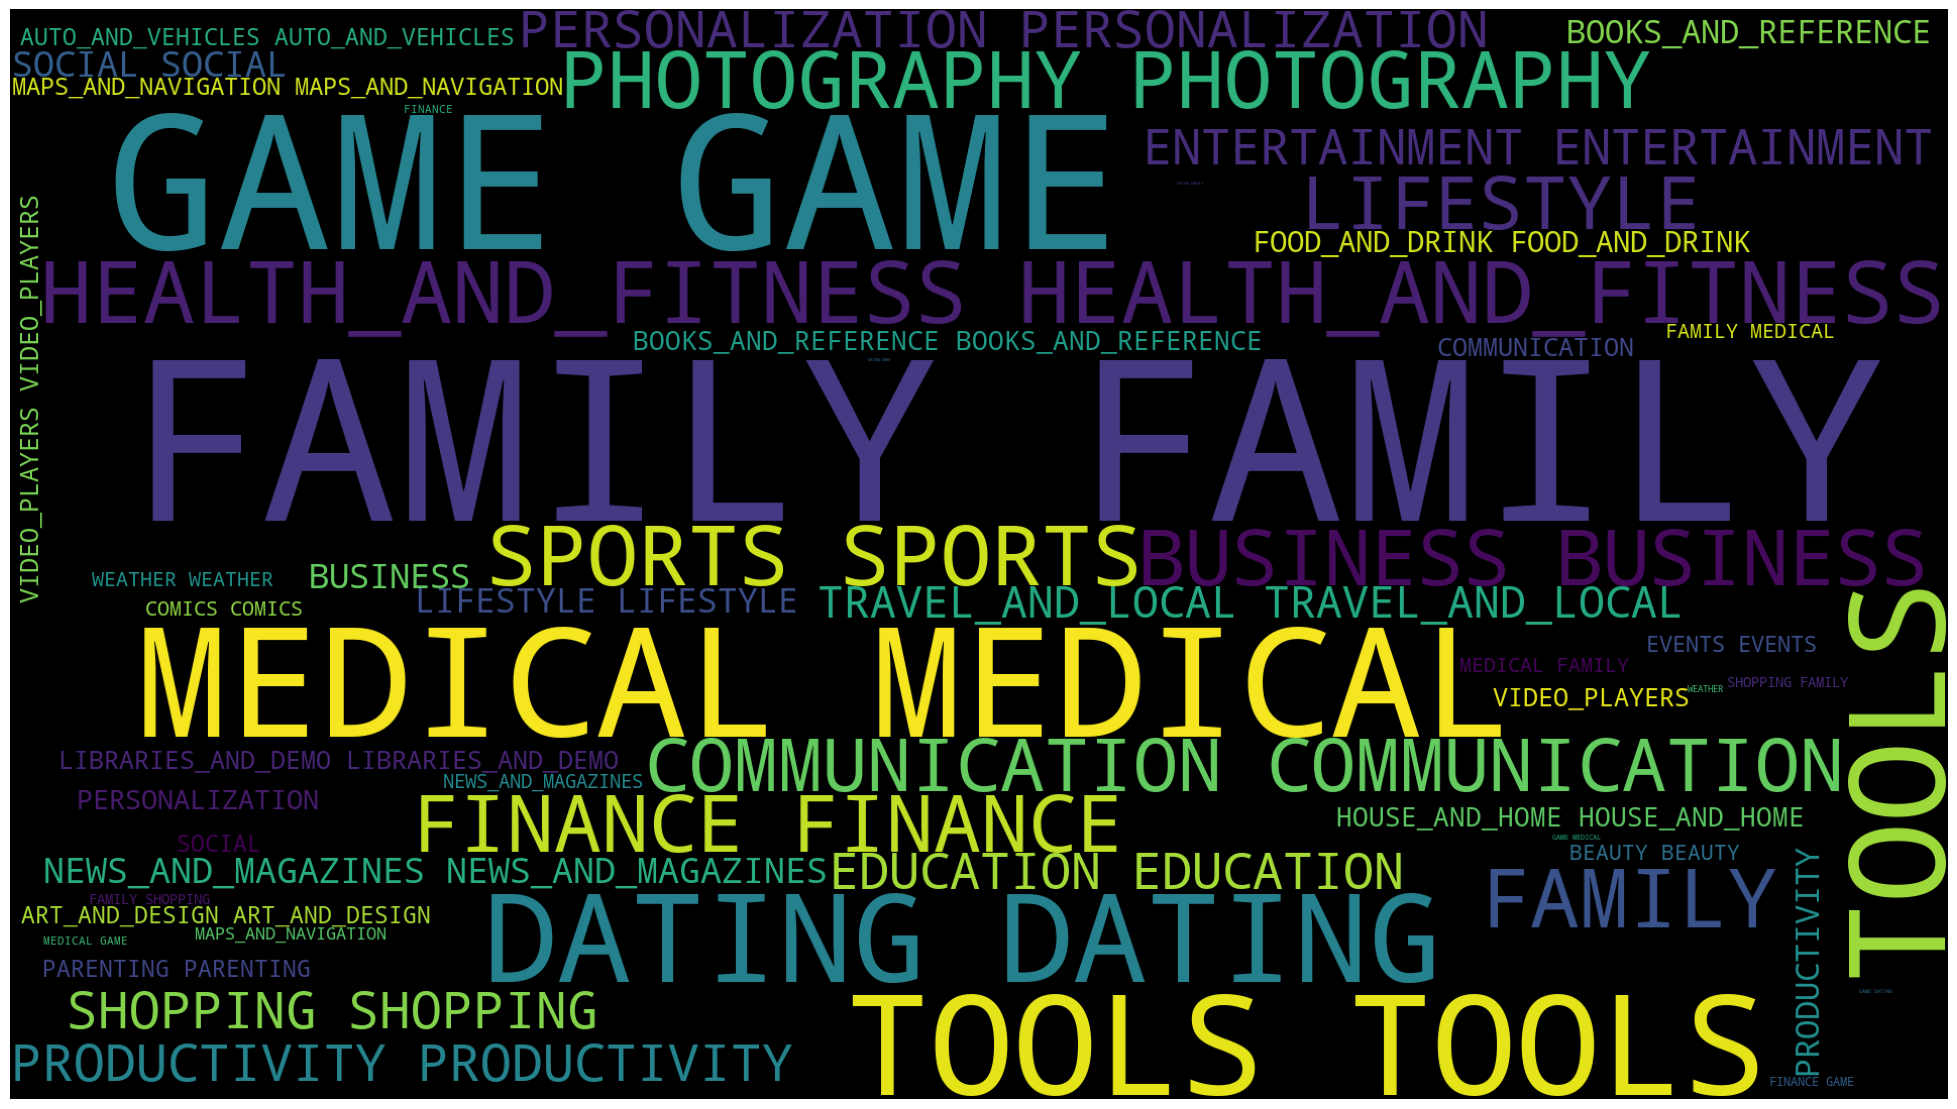

In [1079]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



## Category vs Rating Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'FINANCE'),
  Text(2, 0, 'FOOD_AND_DRINK'),
  Text(3, 0, 'LIBRARIES_AND_DEMO'),
  Text(4, 0, 'BOOKS_AND_REFERENCE'),
  Text(5, 0, 'GAME'),
  Text(6, 0, 'SOCIAL'),
  Text(7, 0, 'ART_AND_DESIGN'),
  Text(8, 0, 'MAPS_AND_NAVIGATION'),
  Text(9, 0, 'PHOTOGRAPHY'),
  Text(10, 0, 'TOOLS'),
  Text(11, 0, 'MEDICAL'),
  Text(12, 0, 'COMMUNICATION'),
  Text(13, 0, 'SHOPPING'),
  Text(14, 0, 'LIFESTYLE'),
  Text(15, 0, 'AUTO_AND_VEHICLES'),
  Text(16, 0, 'VIDEO_PLAYERS'),
  Text(17, 0, 'PERSONALIZATION'),
  Text(18, 0, 'TRAVEL_AND_LOCAL'),
  Text(19, 0, 'HEALTH_AND_FITNESS'),
  Text(20, 0, 'BUSINESS'),
  Text(21, 0, 'SPORTS'),
  Text(22, 0, 'ENTERTAINMENT'),
  Text(23, 0, 'PRODUCTIVITY'),
  Text(24, 0, 'DATING'),
  Text(25, 0, 'EDUCATION'),
  Text(26, 0, 'NEWS_AND_MAGAZINES'),
  Text(27, 0, 'BEAUTY'),
  Text(28, 

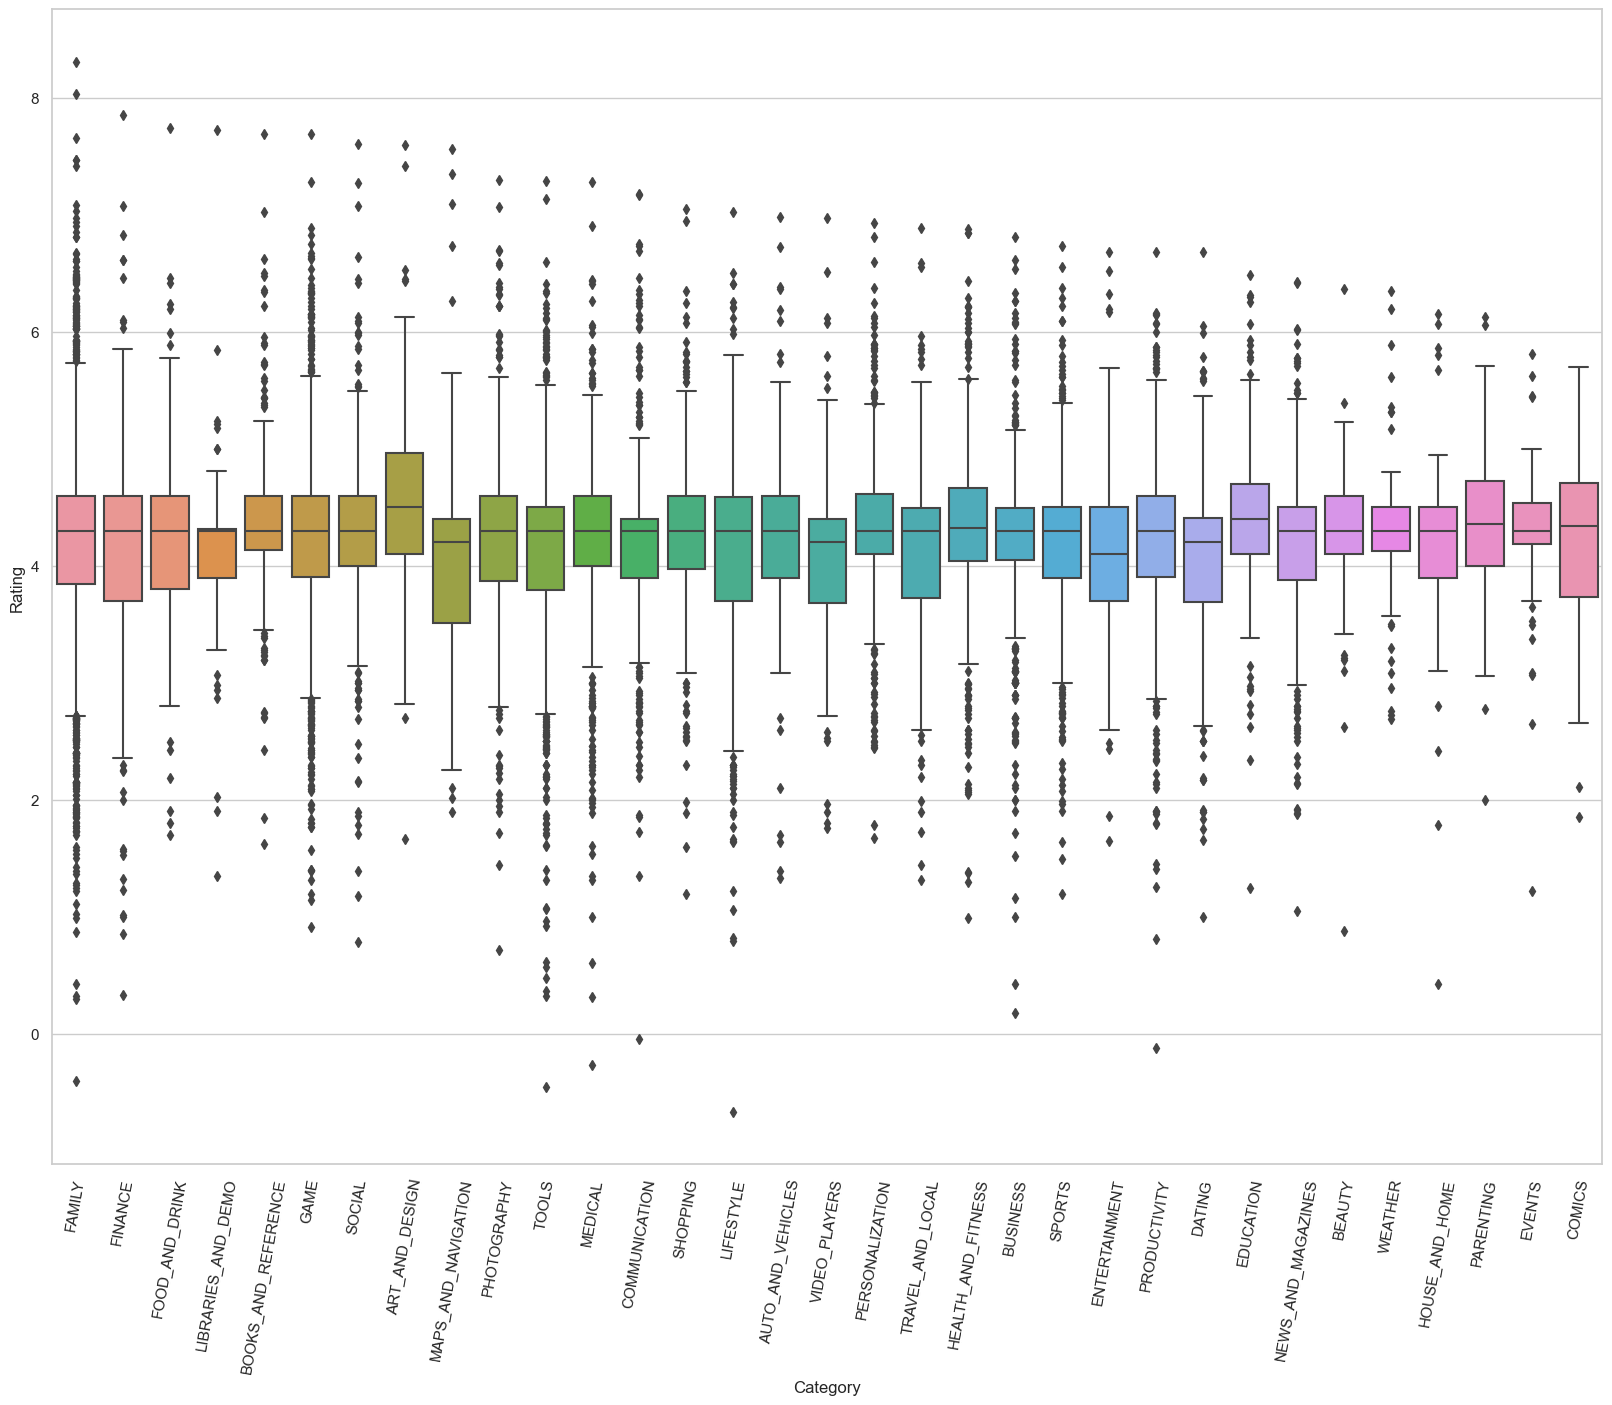

In [1080]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = df.sort_values('Rating',ascending=False))
plt.xticks(rotation=80)


## Type Column

In [1081]:
df['Type'].value_counts()

Type
Free    10033
Paid      800
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

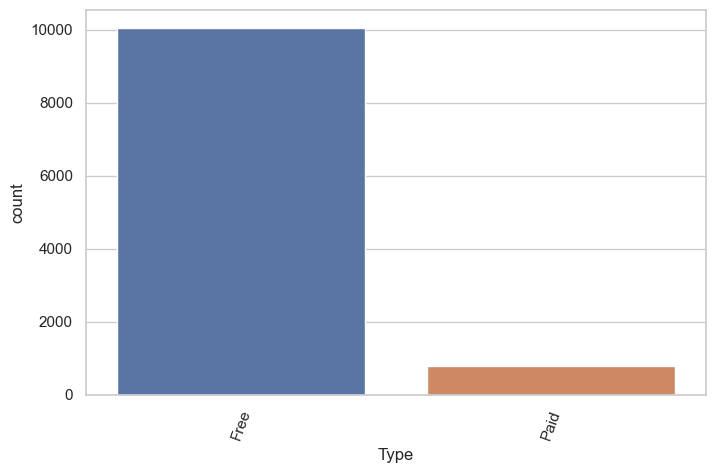

In [1082]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=df)
plt.xticks(rotation=70)

<Axes: ylabel='count'>

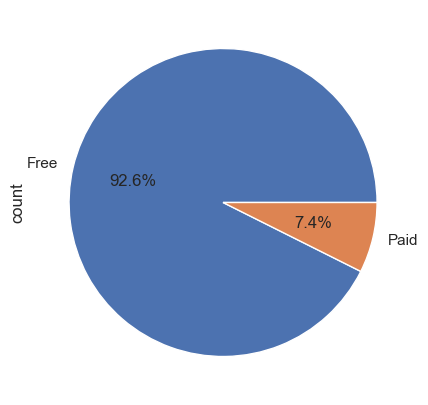

In [1083]:
df["Type"].value_counts().plot.pie(autopct = "%1.1f%%")



## Type vs Rating Analysis

<Figure size 1500x800 with 0 Axes>

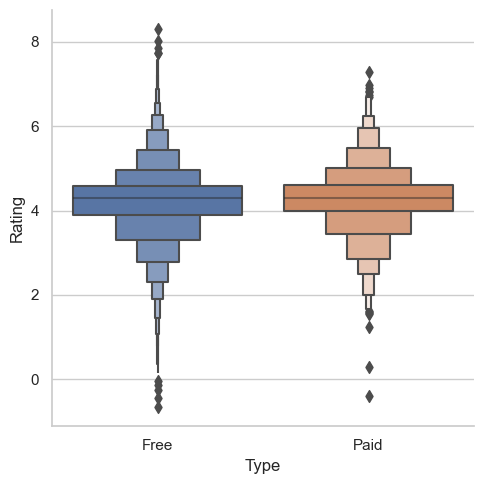

In [1084]:
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = df.sort_values('Rating',ascending=False),kind='boxen')



## Content Rating Column

In [1085]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8708
Teen               1208
Mature 17+          498
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64


## Content Rating vs Rating Analysis

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Mature 17+'),
  Text(3, 0, 'Everyone 10+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

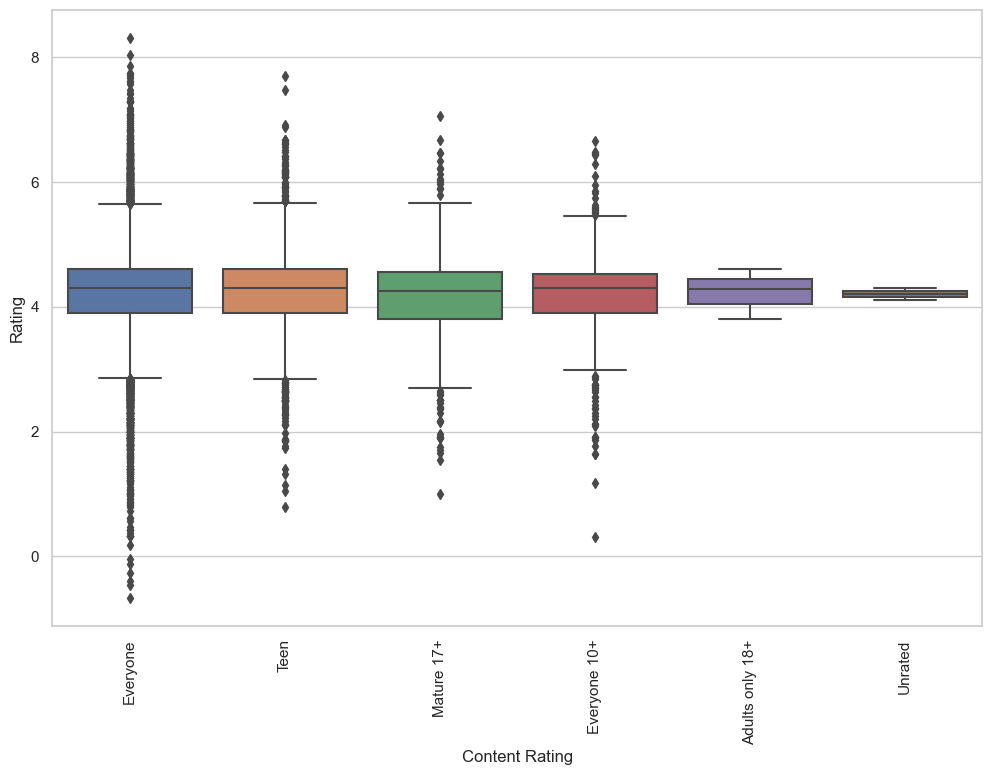

In [1086]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Rating',x='Content Rating',data = df.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)

<Axes: xlabel='Content Rating', ylabel='Installs'>

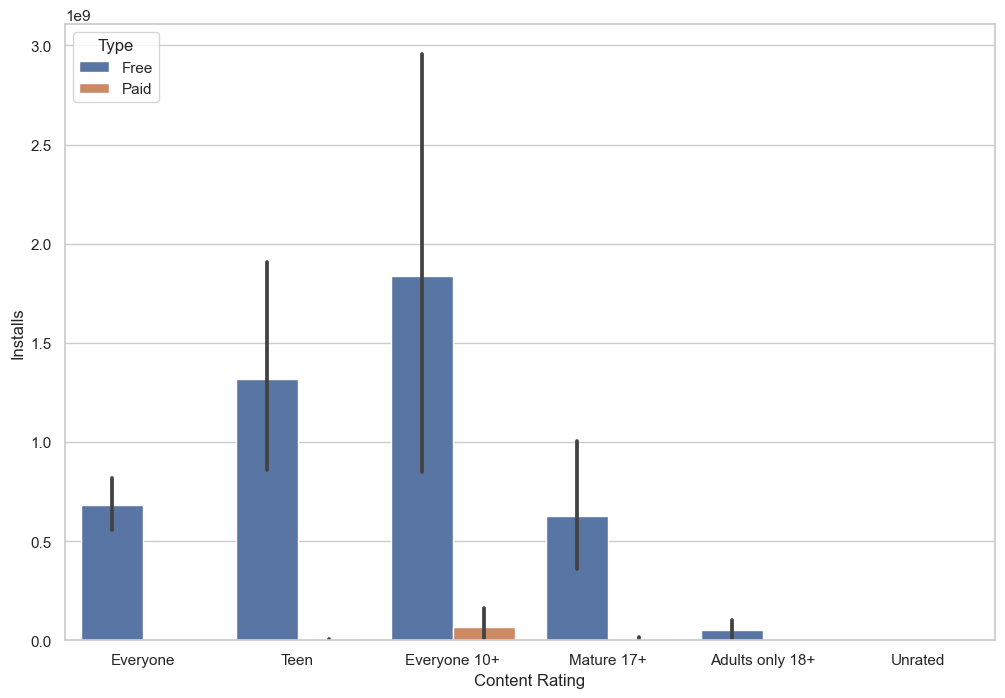

In [1087]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=df)


## Genres Column

In [1088]:
df['Genres'].value_counts()

Genres
Tools                                842
Entertainment                        623
Education                            548
Medical                              463
Business                             459
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64


## Current ver Column

In [1089]:
df['Current Ver'].value_counts()

Current Ver
Varies with device    1454
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64



## Android Ver Column

In [1090]:
df['Android Ver'].value_counts()


Android Ver
4.1 and up            2450
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1356
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [1091]:
# Function to create a scatter plot
def scatters(col1, col2):
    # Create a scatter plot using Seaborn
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.scatterplot(data=df, x=col1, y=col2, hue="Type")
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

# Function to create a KDE plot
def kde_plot(feature):
    # Create a FacetGrid for KDE plots using Seaborn
    grid = sns.FacetGrid(df, hue="Type", aspect=2)

    # Map KDE plots for the specified feature
    grid.map(sns.kdeplot, feature)

    # Add a legend to distinguish between categories
    grid.add_legend()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## kde-Plot Analysis

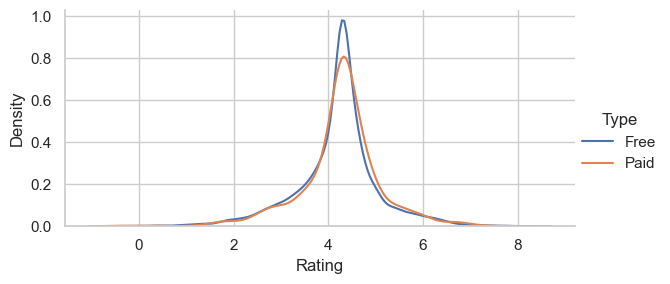

In [1092]:
kde_plot('Rating')

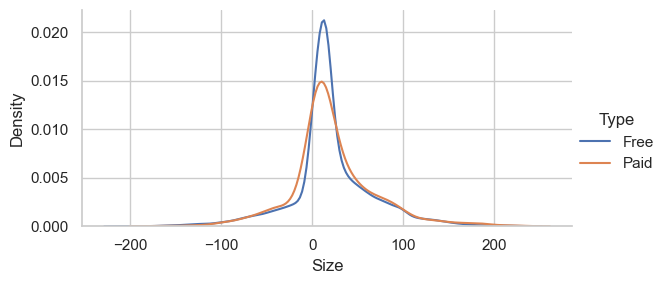

In [1093]:
kde_plot('Size')

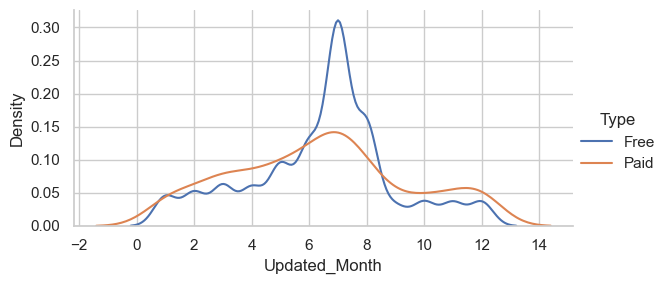

In [1094]:
kde_plot('Updated_Month')

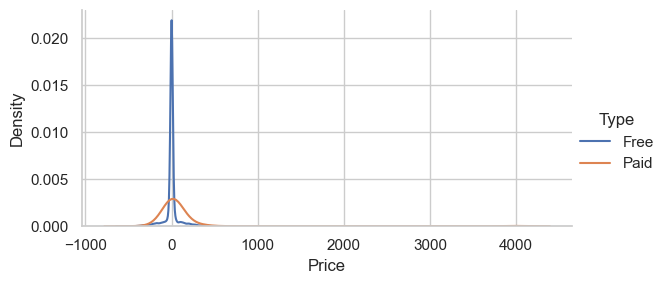

In [1095]:
kde_plot('Price')

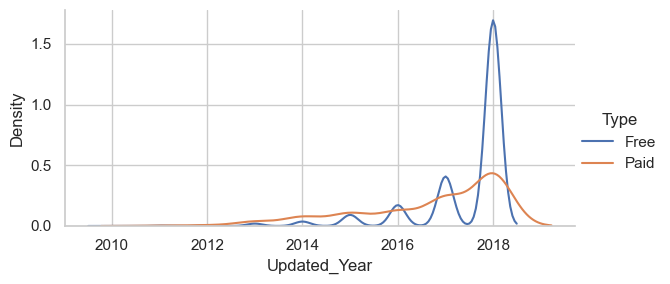

In [1096]:
kde_plot('Updated_Year')



## Scatter plot Analysis

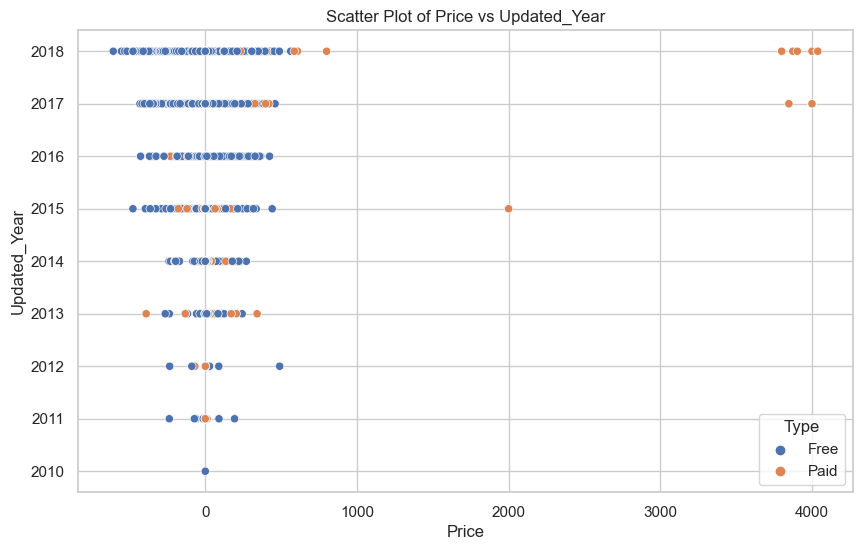

In [1097]:
scatters('Price', 'Updated_Year')

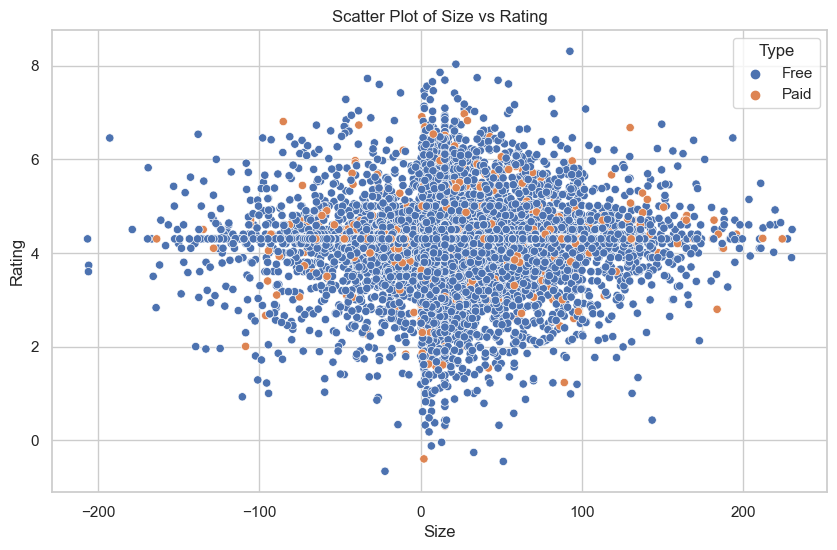

In [1098]:
scatters('Size', 'Rating')

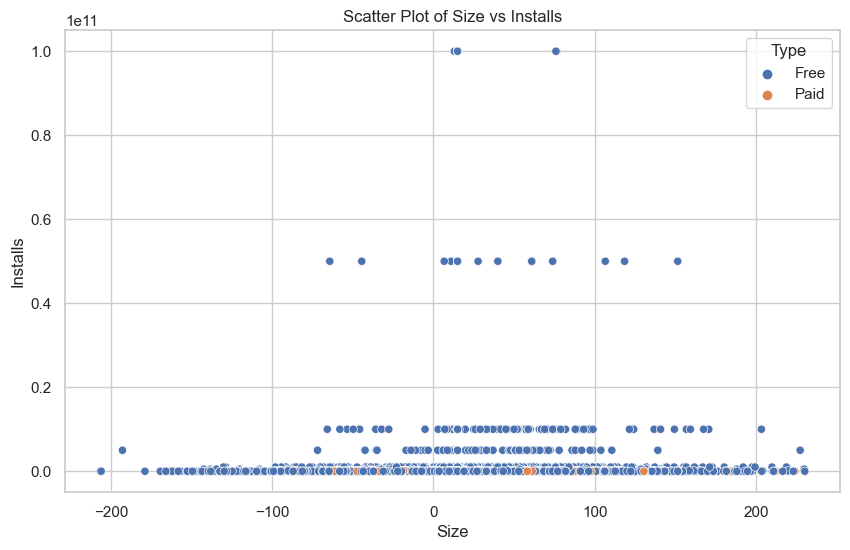

In [1099]:
scatters('Size', 'Installs')

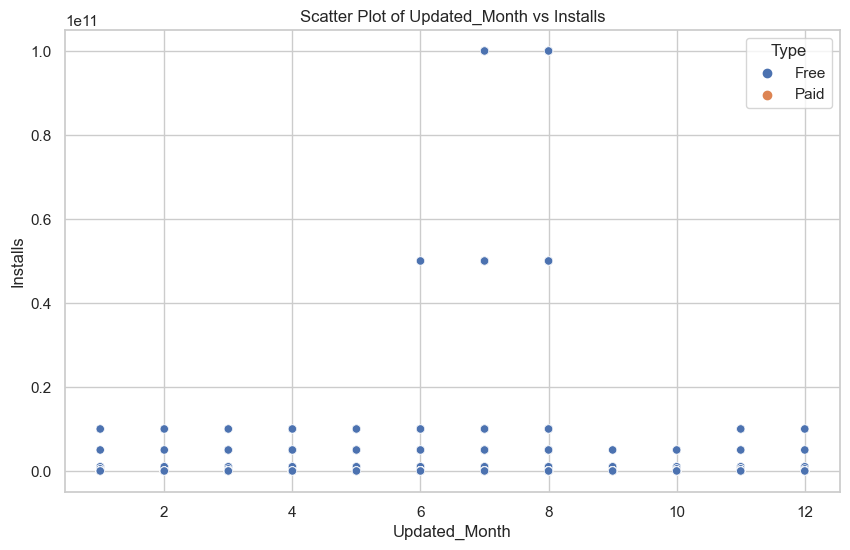

In [1100]:
scatters('Updated_Month', 'Installs')

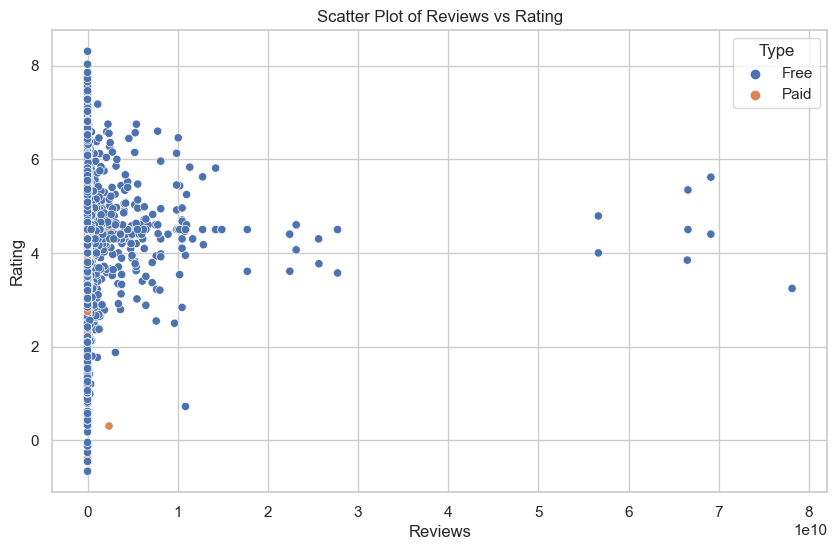

In [1101]:
scatters('Reviews', 'Rating')

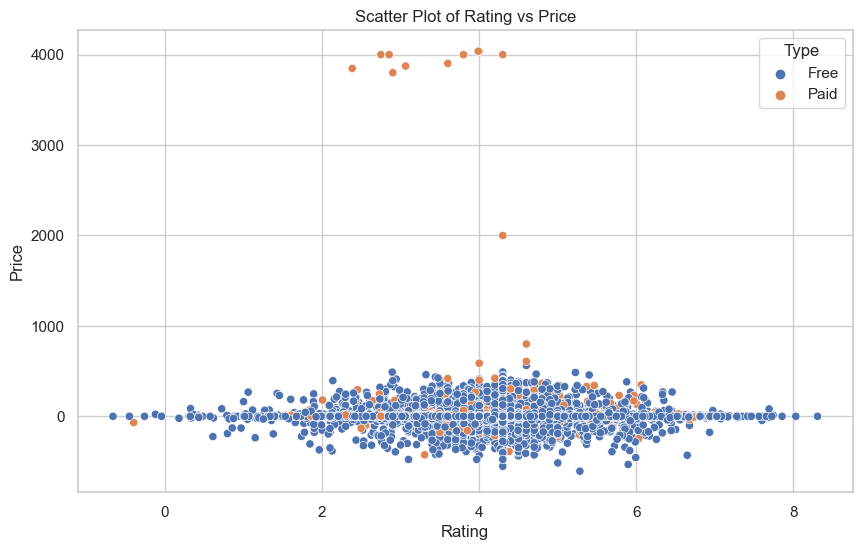

In [1102]:
scatters('Rating', 'Price')



## Further Analysis



### Apps with a 5.0 Rating

In [1103]:
df_rating_5 = df[df.Rating == 5.]
print(f'There are {df_rating_5.shape[0]} apps having rating of 5.0')

There are 142 apps having rating of 5.0




### Installs

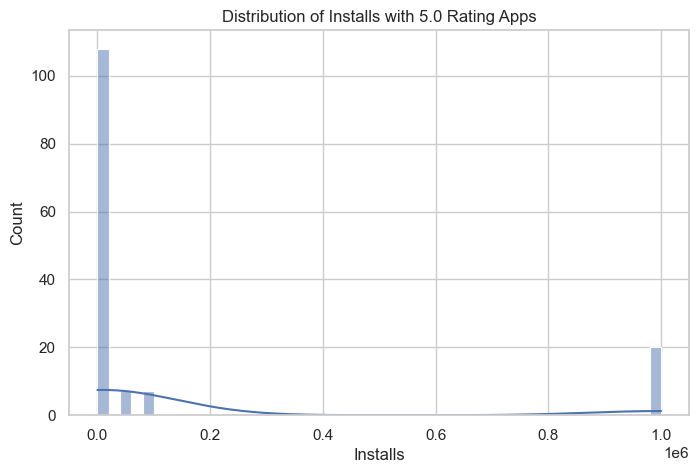

In [1104]:
sns.histplot(data=df_rating_5, x='Installs', kde=True, bins=50)

plt.title('Distribution of Installs with 5.0 Rating Apps')
plt.show()



**Despite the full ratings, the number of installations for the majority of the apps is low. Hence, those apps cannot be considered the best products.**



### Reviews

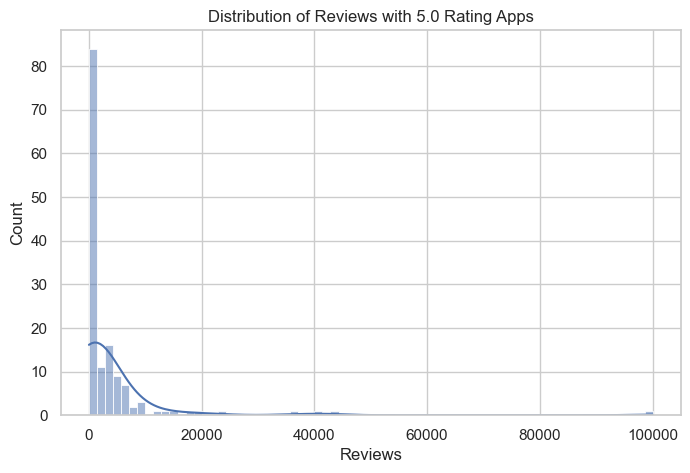

In [1105]:
sns.histplot(data=df_rating_5, x='Reviews', kde=True)
plt.title('Distribution of Reviews with 5.0 Rating Apps')
plt.show()



**The distribution is right-skewed which shows applications with few reviews having 5.0 ratings, which is misleading.**



### Category

In [1106]:
df_rating_5_cat =  df_rating_5['Category'].value_counts().reset_index()

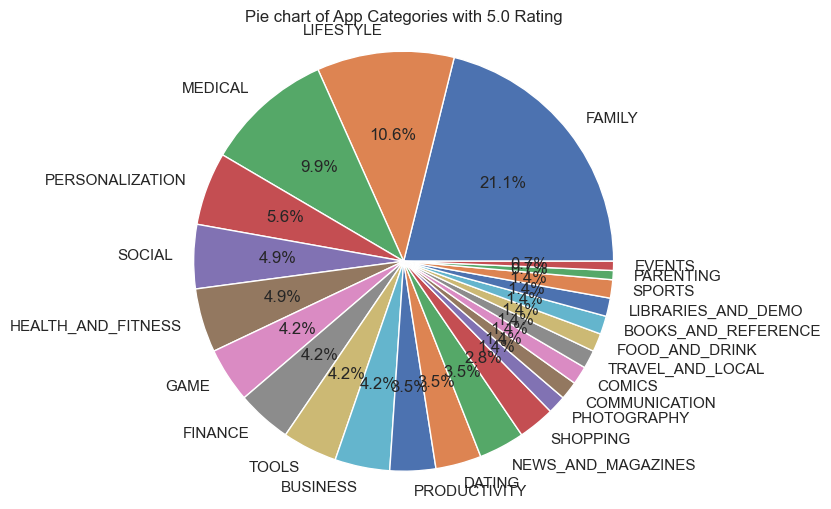

In [1107]:
# Create a pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.pie(df_rating_5_cat.iloc[:, 1], labels=df_rating_5_cat.iloc[:, 0], autopct='%1.1f%%')
plt.title('Pie chart of App Categories with 5.0 Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()



**Family, LifeStyle and Medical apps receive the most 5.0 ratings on Google Play Store with Family representing about quater of whole.**



### Type

In [1108]:
df_rating_5_type =  df_rating_5['Type'].value_counts().reset_index()

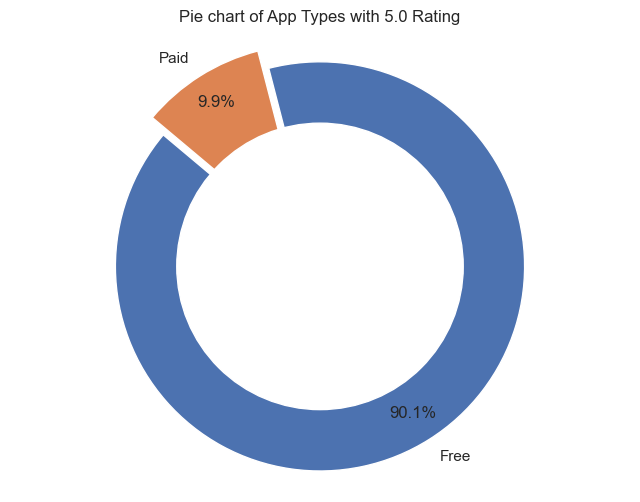

In [1109]:
# Create a pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Data for the pie chart
sizes = df_rating_5_type.iloc[:, 1]
labels = df_rating_5_type.iloc[:, 0]

# Pull a slice out by exploding it
explode = (0, 0.1)  # Adjust the second value to control the pull-out distance

# Create the pie chart with default colors
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Pie chart of App Types with 5.0 Rating')

# Show the pie chart
plt.show()


**Almost 90% of the 5.0 rating apps are free on Goolge Play Store.**

Text(0.5, 1.0, 'Time series plot of Last Updates')

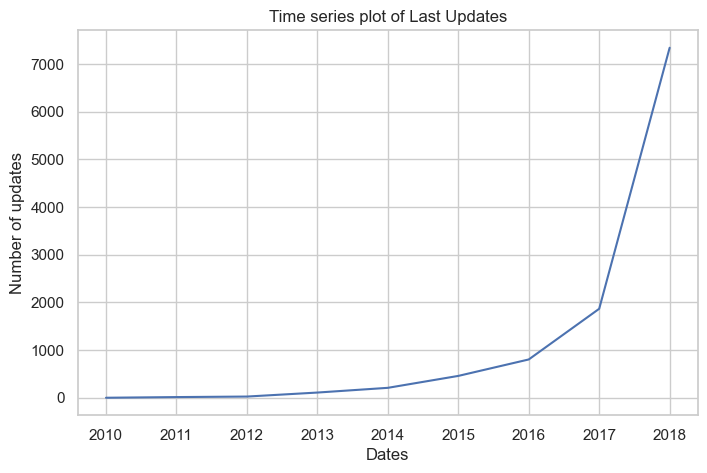

In [1110]:
freq= pd.Series()
freq=df['Updated_Year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")


# Feature Pruning

We decide to prune the following features:

* App : App names are of no value for the model
* Genres : The informations it stores is same as the feature Category
* Current Ver : Current Version of an app doesn't hold significant value.
* Android Ver: Android Version of an app doesn't hold significant value.

In [1111]:
pruned_features = ['App', 'Genres', 'Current Ver', 'Android Ver']


# Step 6 Data Splitting for Modeling
    
### We split the dataset into 80% train and 20% test.

In [1112]:
target = 'Rating'

In [1113]:
X = df.copy().drop(pruned_features+[target], axis=1)
y = df.copy()[target]

In [1114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Label Encoding

In [1115]:
le_dict = defaultdict()


In [1116]:
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Fitting and tranforming the Train data
    X_train[col] = X_train[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    X_test[col] = le.transform(X_test[col]) # Only transforming the test data
    X_test[col] = X_test[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    le_dict[col] = le # Saving the label encoder for individual features

## Standardization

In [1117]:
# Converting and adding "Last Updated Month" to categorical features
categorical_features = features_to_encode + ['Updated_Month']
X_train['Updated_Month'] = X_train['Updated_Month'].astype('category')
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# Listing numeric features to scale
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [1118]:
numeric_features

Index(['Reviews', 'Size', 'Installs', 'Price', 'Updated_Year'], dtype='object')

In [1119]:
scaler = StandardScaler()

# Fitting and transforming the Training data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_train = scaler.fit_transform(X_train)

# Only transforming the Test data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
# X_test = scaler.transform(X_test)


# Step 7 Modeling

## Step 7.1  Regression


### Creating dataframe for metrics

In [1120]:
models = ['Linear', 'KNN', 'Random Forest']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [1121]:
df_metrics_reg

value
model         dataset metric      
Linear        train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
KNN           train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Random Forest train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN


## Linear Regressor

In [1122]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [1123]:
df_metrics_reg.loc['Linear', 'train', 'R2'] = lr.score(X_train, y_train)
df_metrics_reg.loc['Linear', 'test', 'R2'] = lr.score(X_test, y_test)

In [1124]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

df_metrics_reg.loc['Linear', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Linear', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Linear', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

### KNeighbors Regressor

In [1125]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [1126]:
df_metrics_reg.loc['KNN', 'train', 'R2'] = knn.score(X_train, y_train)
df_metrics_reg.loc['KNN', 'test', 'R2'] = knn.score(X_test, y_test)

In [1127]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

df_metrics_reg.loc['KNN', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['KNN', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['KNN', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['KNN', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

### Random Forest Regressor

In [1128]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [1129]:
df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(X_train, y_train)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(X_test, y_test)

In [1130]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

### Regression Evaluation

In [1131]:
# Rounding the values

df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v: round(v, ndigits=3))
df_metrics_reg

value
model         dataset metric       
Linear        train   RMSE    0.852
                      MAE     0.574
                      R2      0.011
              test    RMSE    0.868
                      MAE     0.595
                      R2      0.003
KNN           train   RMSE    0.760
                      MAE     0.552
                      R2      0.214
              test    RMSE    0.948
                      MAE     0.689
                      R2     -0.190
Random Forest train   RMSE    0.851
                      MAE     0.574
                      R2      0.014
              test    RMSE    0.867
                      MAE     0.593
                      R2      0.005

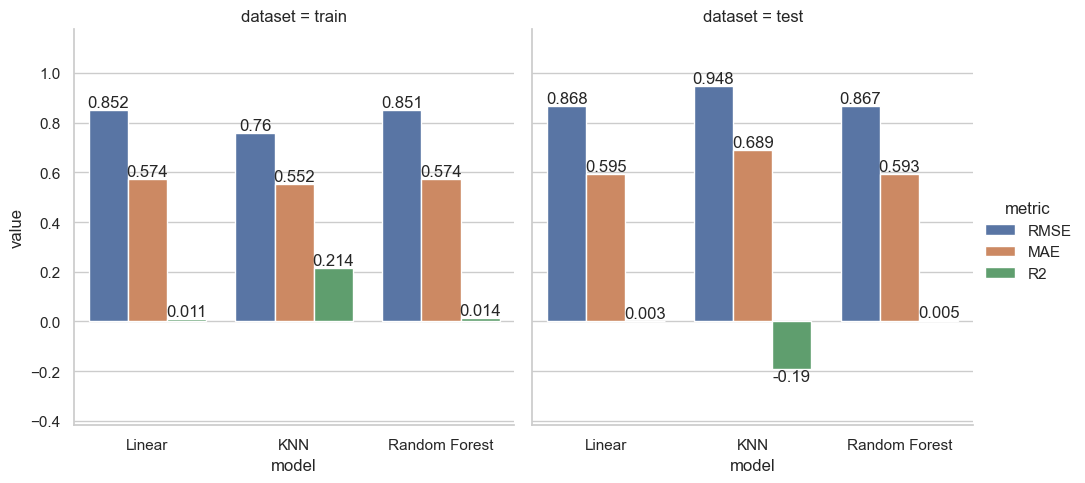

In [1132]:
data = df_metrics_reg.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()


    
* **The Regression predictions don't hold up very well!**

* **We can interpret that the dataset is not suitable for regression problem.**


## Step 7.2 Classification


    

### Let's frame it as a classification problem statement.

### Converting the Rating from continuous to discrete

In [1133]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)


    
### Creating dataframe for metrics

In [1134]:
models = ['Logistic Regression', 'KNN', 'Random Forest']
datasets = ['train', 'test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index,
                          columns=['accuracy %'])

In [1135]:
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression train          NaN
                    test           NaN
KNN                 train          NaN
                    test           NaN
Random Forest       train          NaN
                    test           NaN


    
### Logistic Regression Classifier

In [1136]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train_int)

LogisticRegression()

In [1137]:
df_metrics_clf.loc['Logistic Regression', 'train'] = lr_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'test'] = lr_clf.score(X_test, y_test_int)


    
### KNeighbors Classifier

In [1138]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_int)

KNeighborsClassifier()

In [1139]:
df_metrics_clf.loc['KNN', 'train'] = knn_clf.score(X_train, y_train_int)
df_metrics_clf.loc['KNN', 'test'] = knn_clf.score(X_test, y_test_int)


### Random Forest Classifier

In [1140]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_int)

RandomForestClassifier()

In [1141]:
df_metrics_clf.loc['Random Forest', 'train'] = rf_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'test'] = rf_clf.score(X_test, y_test_int)


    
### Classification Evaluation

In [1142]:
# Rounding and coverting the accuracies to percentages
df_metrics_clf['accuracy %'] = df_metrics_clf['accuracy %'].apply(lambda v: round(v*100, ndigits=2))
df_metrics_clf

accuracy %
model               dataset            
Logistic Regression train         59.90
                    test          58.38
KNN                 train         63.81
                    test          50.48
Random Forest       train         99.86
                    test          56.21

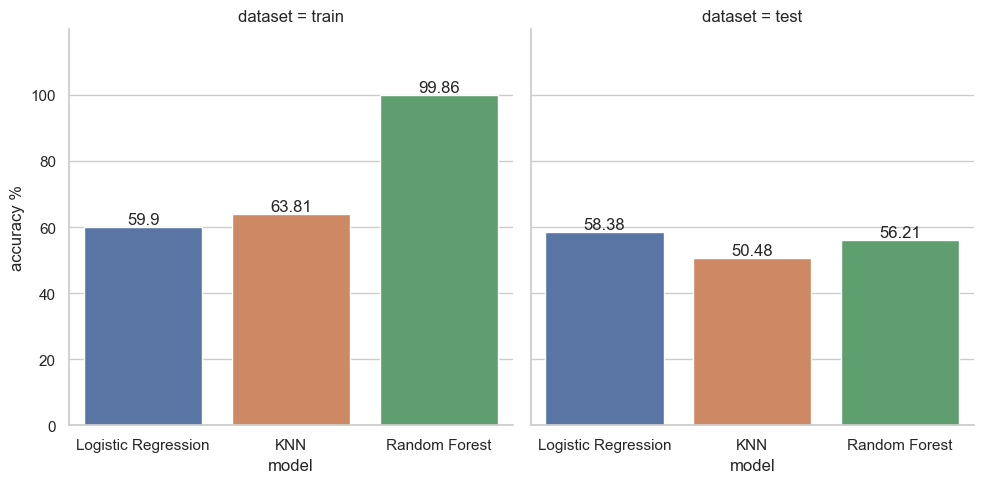

In [1143]:
data = df_metrics_clf.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='accuracy %')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()


**After comparing with Regression models, its clear that we would get better results from Classification!**


## Conclusion



* In conclusion, the dataset from Google Play Store apps has been explored and analyzed using various data visualization techniques with the help of Matplotlib, Seaborn and Plotly libraries.

* The preliminary analysis, visualization methods and EDA provided insights into the data and helped in understanding the underlying patterns and relationships among the variables.

* The analysis of the Google Play Store dataset has shown that there is a weak correlation between the rating and other app attributes such as size, installs, reviews, and price. We found that there was a moderate positive correlation between the number of installs and the rating, suggesting that higher-rated apps tend to have more installs.

* We also observed that free apps have higher ratings than paid apps, and that app size does not seem to have a significant impact on rating.